# Проект: Линейные модели в машинном обучении

# Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:

1. Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:

- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

# Описание данных

Вы будете работать с тремя датасетами:
- ferma_main.csv
- ferma_dad.csv
- cow_buy.csv


1. Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. 

Описание данных:  

    id — уникальный идентификатор коровы.  
    Удой, кг — масса молока, которую корова даёт в год (в килограммах).  
    ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.  
    Сырой протеин, г — содержание сырого протеина в корме (в граммах).  
    СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.  
    Порода — порода коровы.  
    Тип пастбища — ландшафт лугов, на которых паслась корова.  
    порода папы_быка — порода папы коровы.  
    Жирность,% — содержание жиров в молоке (в процентах).  
    Белок,% — содержание белков в молоке (в процентах).  
    Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).  
    Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).  
    
Признаки в датасете ferma_main.csv можно разделить на группы.

    Характеристики коровы: id, Порода, порода папы_быка, Возраст.
    Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
    Характеристика пастбища: Тип пастбища.
    Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.
    
Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.
    
2. Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера.   
Описание данных:  
    id — уникальный идентификатор коровы.  
    Имя Папы — имя папы коровы.  
3. Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.

Описание данных:
    Порода — порода коровы.  
    Тип пастбища — ландшафт лугов, на которых паслась корова.  
    порода папы_быка — порода папы коровы.  
    Имя_папы — имя папы коровы.  
    Текущая_жирность,% — содержание жиров в молоке (в процентах).  
    Текущий_уровень_белок,% — содержание белков в молоке (в процентах).  
    Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).  
    
Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.

- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
- Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

## Шаг 1. Загрузка данных

**Подключаем необходимые библиотеки**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
import seaborn as sns
import scipy.stats as st

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix



**Откроем датафрейм и выведем информацию по нему.**

In [4]:
# Загрузка данных
ferma_main = pd.read_csv('C://Users/rdl_b/OneDrive/Рабочий стол/python/Yandex Practicum/Загрузка проектов/Проект 6 линейные модели/ferma_main.csv', sep=';')
ferma_dad = pd.read_csv('C://Users/rdl_b/OneDrive/Рабочий стол/python/Yandex Practicum/Загрузка проектов/Проект 6 линейные модели/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('C://Users/rdl_b/OneDrive/Рабочий стол/python/Yandex Practicum/Загрузка проектов/Проект 6 линейные модели/cow_buy.csv', sep=';')

print("Информация о данных о стаде фермера:")
print(ferma_main.info())
print("\nПервые строки данных о стаде фермера:")
ferma_main.head()


Информация о данных о стаде фермера:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-nu

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [5]:
# Переименование столбцов
ferma_main.rename(columns={
    'id': 'id',
    'Удой, кг': 'milk_yield_kg',
    'ЭКЕ (Энергетическая кормовая единица)': 'energy_feed_unit',
    'Сырой протеин, г': 'raw_protein_g',
    'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'father_breed',
    'Жирность,%': 'fat_percentage',
    'Белок,%': 'protein_percentage',
    'Вкус молока': 'milk_taste',
    'Возраст': 'age'
}, inplace=True)

# Просмотр обновленных названий столбцов
ferma_main.head()

,id,milk_yield_kg,energy_feed_unit,raw_protein_g,sugar_protein_ratio,breed,pasture_type,father_breed,fat_percentage,protein_percentage,milk_taste,age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [6]:
print("\nИнформация о данных о папах коров:")
print(ferma_dad.info())
print("\nПервые строки данных о папах коров:")
ferma_dad.head()


Информация о данных о папах коров:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None

Первые строки данных о папах коров:


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [7]:
ferma_dad = ferma_dad.rename(columns = {"Имя Папы": "father_name"})

In [8]:
print("\nИнформация о данных о коровах для покупки:")
print(cow_buy.info())
print("\nПервые строки данных о коровах для покупки:")
cow_buy.head()


Информация о данных о коровах для покупки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
None

Первые строки данных о коровах для покупки:


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [9]:
# Переименование столбцов в датасете cow_buy
cow_buy.rename(columns={
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'father_breed',
    'Имя_папы': 'father_name',
    'Текущая_жирность,%': 'fat_percentage_current',
    'Текущий_уровень_белок,%': 'protein_percentage_current',
    'Возраст': 'age'
}, inplace=True)

# Просмотр обновленных названий столбцов
print(cow_buy.columns)


Index(['breed', 'pasture_type', 'father_breed', 'father_name',
       'fat_percentage_current', 'protein_percentage_current', 'age'],
      dtype='object')


Рассмотрели информацию у датафрейме.
1. Узнали кол-во столбцов, строк, типы столбцов и значения в них.
2. Переменовали столбцы в змеиный регистр.
3. Некоторые типы столбцов не соответствуют данным, далее нужно будет это исправить. На следующем этапе распишу какие и почему.

##  Шаг 2. Предобработка данных

In [10]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   634 non-null    int64 
 1   milk_yield_kg        634 non-null    int64 
 2   energy_feed_unit     634 non-null    object
 3   raw_protein_g        634 non-null    int64 
 4   sugar_protein_ratio  634 non-null    object
 5   breed                634 non-null    object
 6   pasture_type         634 non-null    object
 7   father_breed         634 non-null    object
 8   fat_percentage       634 non-null    object
 9   protein_percentage   634 non-null    object
 10  milk_taste           634 non-null    object
 11  age                  634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


In [11]:
ferma_main.head()

,id,milk_yield_kg,energy_feed_unit,raw_protein_g,sugar_protein_ratio,breed,pasture_type,father_breed,fat_percentage,protein_percentage,milk_taste,age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [12]:
ferma_main.shape

(634, 12)

In [13]:
ferma_main['pasture_type'] = ferma_main['pasture_type'].replace('Равнинные', 'Равнинное')

In [14]:
ferma_main['father_breed'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [15]:
ferma_main['father_breed'] = ferma_main['father_breed'].replace('Айдиалл', 'Айдиал')

**Проверим наличия дубликатов в данных**

In [16]:
print("\nКоличество дубликатов в данных о стаде фермера:", ferma_main.duplicated().sum())


Количество дубликатов в данных о стаде фермера: 5


In [17]:
ferma_main.tail(10)

,id,milk_yield_kg,energy_feed_unit,raw_protein_g,sugar_protein_ratio,breed,pasture_type,father_breed,fat_percentage,protein_percentage,milk_taste,age
624,625,6812,"15,4",1964,"0,94",РефлешнСоверинг,Равнинное,Айдиал,"3,74","3,075",не вкусно,более_2_лет
625,626,5513,"12,9",1700,"0,88",РефлешнСоверинг,Равнинное,Соверин,"3,64","3,073",вкусно,менее_2_лет
626,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
627,628,5746,"13,8",1994,"0,89",РефлешнСоверинг,Равнинное,Соверин,"3,64","3,077",вкусно,более_2_лет
628,629,6503,"16,2",2283,"0,94",Вис Бик Айдиал,Холмистое,Соверин,"3,71","3,076",вкусно,более_2_лет
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
633,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


**Последние 5 значений дублируются, удалим лишние.**

In [18]:
ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)

In [19]:
print("Количество дубликатов в данных о папах коров:", ferma_dad.duplicated().sum())

Количество дубликатов в данных о папах коров: 0


In [20]:
print("Количество дубликатов в данных о коровах для покупки:", cow_buy.duplicated().sum())

Количество дубликатов в данных о коровах для покупки: 4


**Проверим типы данных**

In [21]:
print("\nИнформация о типах данных в данных о стаде фермера:")
print(ferma_main.dtypes)


Информация о типах данных в данных о стаде фермера:
id                      int64
milk_yield_kg           int64
energy_feed_unit       object
raw_protein_g           int64
sugar_protein_ratio    object
breed                  object
pasture_type           object
father_breed           object
fat_percentage         object
protein_percentage     object
milk_taste             object
age                    object
dtype: object


In [22]:
print("Уникальные значения для столбца 'energy_feed_unit':", ferma_main['energy_feed_unit'].unique())
print("\nУникальные значения для столбца 'sugar_protein_ratio':", ferma_main['sugar_protein_ratio'].unique())
print("\nУникальные значения для столбца 'fat_percentage':", ferma_main['fat_percentage'].unique())
print("\nУникальные значения для столбца 'protein_percentage':", ferma_main['protein_percentage'].unique())
print("\nУникальные значения для столбца 'milk_taste':", ferma_main['milk_taste'].unique())
print("\nУникальные значения для столбца 'age':", ferma_main['age'].unique())


Уникальные значения для столбца 'energy_feed_unit': ['14,2' '12,8' '14' '12,4' '12,7' '13,2' '14,7' '13,4' '13,7' '16,5'
 '15,4' '14,5' '16' '15,6' '11,5' '15,7' '14,3' '15,5' '14,6' '15,9'
 '15,2' '14,8' '16,4' '11,8' '14,4' '16,1' '12,9' '13,8' '13,3' '16,3'
 '13,9' '14,1' '16,7' '15,8' '16,2' '12,2' '14,9' '13,6' '12,5' '16,8'
 '13,5' '15,1' '12,1' '16,6' '15,3' '13,1' '12,3' '11,9' '12,6' '15' '13'
 '12' '11,1' '11,7' '10,9']

Уникальные значения для столбца 'sugar_protein_ratio': ['0,89' '0,885' '0,93' '0,94' '0,895' '0,95' '0,96' '0,85' '0,84' '0,86'
 '0,88' '0,9']

Уникальные значения для столбца 'fat_percentage': ['3,58' '3,54' '3,59' '3,4' '3,73' '3,13' '3,48' '3,55' '3,71' '3,72'
 '3,61' '3,22' '3,03' '3,49' '3,31' '3,7' '3,74' '3,21' '3,11' '3,25'
 '3,34' '3,24' '3,53' '3,16' '3,26' '3,57' '3,44' '3,38' '3,18' '3,42'
 '3,62' '3,75' '3,41' '3,27' '3,63' '3,12' '3,64' '3,69' '3,37' '3,65'
 '3,33' '3,28' '3,35' '3,32' '3,23' '3,15' '3,01' '2,99' '3,39' '3,19']

Уникальные значе

**Для столбцов energy_feed_unit, sugar_protein_ratio, fat_percentage и protein_percentage необходимо преобразовать значения из строкового типа в числовой. Для этого заменим запятые на точки и преобразуем их в тип данных float.**

**Столбец milk_taste может быть преобразован в бинарный формат, где "вкусно" будет представлено как 1, а "не вкусно" как 0.**

**Столбец age также может быть преобразован в бинарный формат, где "более_2_лет" будет представлено как 1, а "менее_2_лет" как 0.**

In [23]:
# Преобразование столбцов с числовыми значениями
ferma_main['energy_feed_unit'] = ferma_main['energy_feed_unit'].str.replace(',', '.').astype(float)
ferma_main['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'].str.replace(',', '.').astype(float)
ferma_main['fat_percentage'] = ferma_main['fat_percentage'].str.replace(',', '.').astype(float)
ferma_main['protein_percentage'] = ferma_main['protein_percentage'].str.replace(',', '.').astype(float)

# Преобразование столбцов с категориальными значениями в бинарный формат
ferma_main['milk_taste'] = ferma_main['milk_taste'].map({'вкусно': 1, 'не вкусно': 0})
ferma_main['age'] = ferma_main['age'].map({'более_2_лет': 1, 'менее_2_лет': 0})

# Проверка результатов преобразований
print(ferma_main.dtypes)


id                       int64
milk_yield_kg            int64
energy_feed_unit       float64
raw_protein_g            int64
sugar_protein_ratio    float64
breed                   object
pasture_type            object
father_breed            object
fat_percentage         float64
protein_percentage     float64
milk_taste               int64
age                      int64
dtype: object


In [24]:
print("\nИнформация о типах данных в данных о папах коров:")
print(ferma_dad.dtypes)



Информация о типах данных в данных о папах коров:
id              int64
father_name    object
dtype: object


In [25]:
print("\nИнформация о типах данных в данных о коровах для покупки:")
print(cow_buy.dtypes)


Информация о типах данных в данных о коровах для покупки:
breed                         object
pasture_type                  object
father_breed                  object
father_name                   object
fat_percentage_current        object
protein_percentage_current    object
age                           object
dtype: object


**Столбцы fat_percentage_current и protein_percentage_current нужно преобразовать из строкового типа в числовой. Для этого необходимо заменить запятые на точки и преобразовать их в тип данных float.**

**Столбец age также может быть преобразован в бинарный формат, где "более_2_лет" будет представлено как 1, а "менее_2_лет" как 0.**

In [26]:
# Преобразование столбцов с числовыми значениями
cow_buy['fat_percentage_current'] = cow_buy['fat_percentage_current'].str.replace(',', '.').astype(float)
cow_buy['protein_percentage_current'] = cow_buy['protein_percentage_current'].str.replace(',', '.').astype(float)

# Преобразование столбца с категориальными значениями в бинарный формат
cow_buy['age'] = cow_buy['age'].map({'более_2_лет': 1, 'менее_2_лет': 0})

# Проверка результатов преобразований
print(cow_buy.dtypes)


breed                          object
pasture_type                   object
father_breed                   object
father_name                    object
fat_percentage_current        float64
protein_percentage_current    float64
age                             int64
dtype: object


**Вывод** 

       Для датафрейма "ferma_main"
        1. Исправили однотипные значения в "ferma_main" в столбце с типом пастбищ ('Равнинные' на 'Равнинное')
        2. Убраны лишние дубликаты в "ferma_main"
        3. Изменены типы данных из 'object' в числовые типы, а именно столбцы (energy_feed_unit, sugar_protein_ratio, fat_percentage и protein_percentage)
        4. Преобразовали столбы milk_taste и age в бинарный формат 
        
       Для датафрейма "cow_buy"
        1. Столбцы fat_percentage_current и protein_percentage_current преобразованы в числовой тип
        2. Столбец "age" преобразован в бинарный формат


## Шаг 3. Исследовательский анализ данных

### Проведём статистический анализ всех признаком


In [27]:
# Статистический анализ всех признаков
ferma_main.describe()

,id,milk_yield_kg,energy_feed_unit,raw_protein_g,sugar_protein_ratio,fat_percentage,protein_percentage,milk_taste,age
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671,0.589825,0.825119
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549,0.492257,0.380167
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000,0.000000,0.000000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000,0.000000,1.000000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000,1.000000,1.000000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000,1.000000,1.000000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000,1.000000,1.000000


**Наблюдается аномальное значение удоя молока "45616 кг", предлагаю удалить данную строку, т.к. она одна во всем датафрейме**

In [28]:
ferma_main.loc[[15,16,17]]

,id,milk_yield_kg,energy_feed_unit,raw_protein_g,sugar_protein_ratio,breed,pasture_type,father_breed,fat_percentage,protein_percentage,milk_taste,age
15,16,6518,15.6,1747,0.930,Вис Бик Айдиал,Равнинное,Айдиал,3.73,3.076,1,1
16,17,45616,11.5,1675,0.930,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,1,1
17,18,5777,12.4,1873,0.895,Вис Бик Айдиал,Холмистое,Айдиал,3.03,3.080,1,1


In [29]:
ferma_main.drop(16, inplace=True)

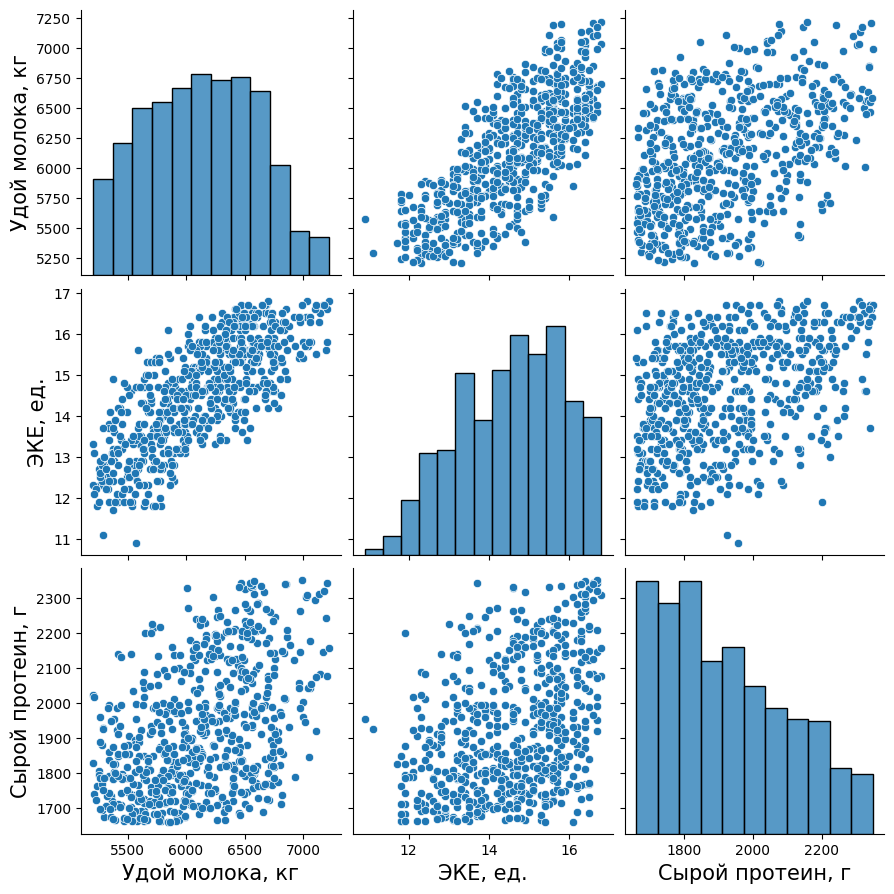

In [30]:
# Графики для количественных признаков
numerical_features = ['milk_yield_kg', 'energy_feed_unit', 'raw_protein_g']
pairplot = sns.pairplot(ferma_main[numerical_features], height=3)

translated_names = {'milk_yield_kg': 'Удой молока, кг', 
                    'energy_feed_unit': 'ЭКЕ, ед.',
                    'raw_protein_g': 'Сырой протеин, г'}

# Установка русских названий осей X и Y
for i in range(len(numerical_features)):
    pairplot.axes[i][0].set_ylabel(translated_names[numerical_features[i]], fontsize=15)
    pairplot.axes[len(numerical_features)-1][i].set_xlabel(translated_names[numerical_features[i]], fontsize=15)

plt.show() 


<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Ну здесь всё отлично, понимающему человеку ясно, что здесь ты детально исследуешь столбцы-признаки наших наблюдений. Вижу гистограммы/графики, отрисовывающие "нумерические" столбцы.

Здесь идеально всё. Использование графиков для изучения данных - лучше и не пожелать способа. Молодец!
</div>

Что касается выводов, из графиков парных взаимосвязей можно сделать следующие наблюдения:

milk_yield_kg и energy_feed_unit: На графике рассеяния видно, как связаны удой молока и энергетическая кормовая единица. Можно заметить, что в целом удой молока увеличивается с увеличением энергетической кормовой единицы.

milk_yield_kg и raw_protein_g: Также на графике рассеяния видна некоторая взаимосвязь между удоем молока и содержанием сырого протеина в корме. Это может свидетельствовать о том, что более высокое содержание протеина в корме может способствовать увеличению удоя молока.

energy_feed_unit и raw_protein_g: График показывает связь между энергетической кормовой единицей и содержанием сырого протеина в корме. Видно, что с увеличением энергетической кормовой единицы содержание сырого протеина в корме также может увеличиваться.

Эти наблюдения могут быть полезны для дальнейшего анализа данных и принятия решений о кормлении коров для оптимизации удоя молока.

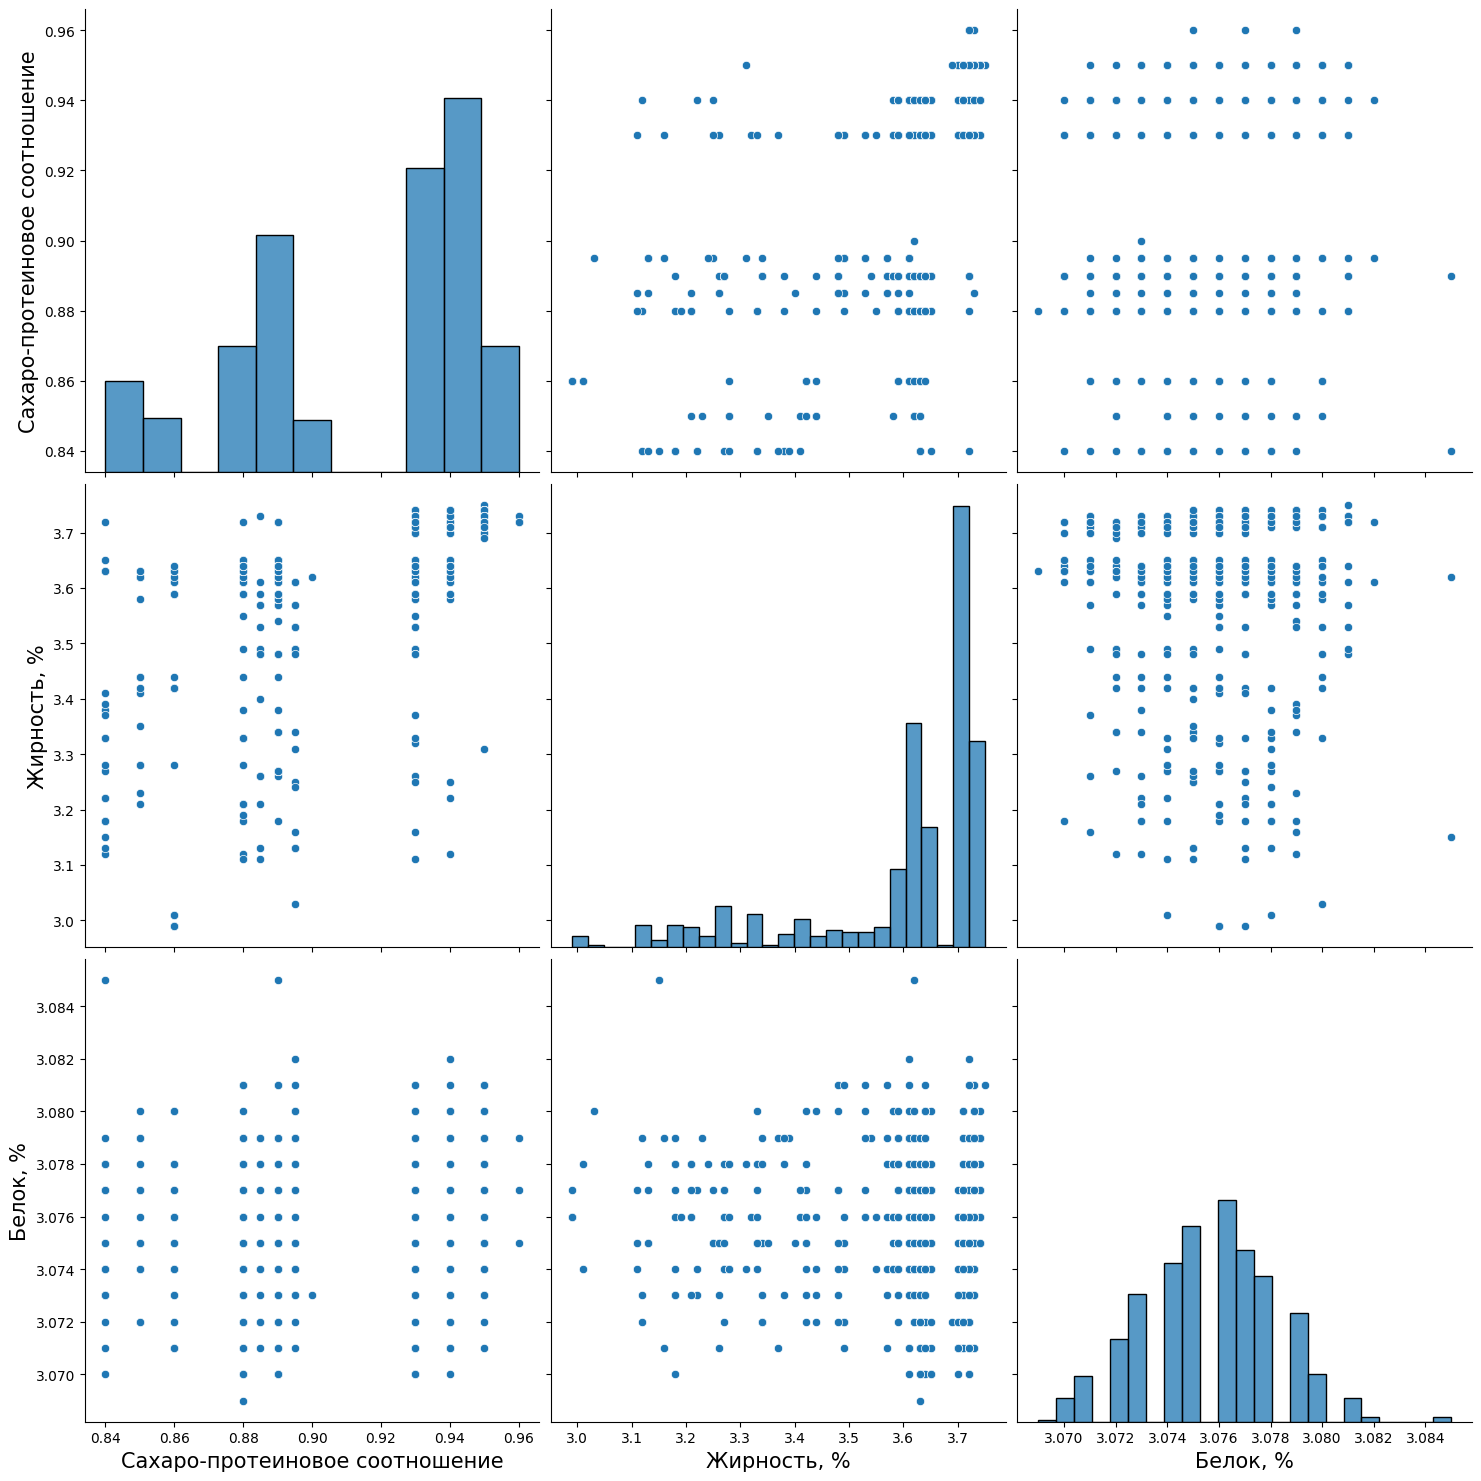

In [31]:
# Графики для количественных признаков
numerical_features = ['sugar_protein_ratio', 'fat_percentage', 'protein_percentage']
pairplot = sns.pairplot(ferma_main[numerical_features], height=5)

# Словарь для перевода английских названий признаков в русские
translated_names = {'sugar_protein_ratio': 'Сахаро-протеиновое соотношение',
                    'fat_percentage': 'Жирность, %',
                    'protein_percentage': 'Белок, %'}

# Установка русских названий осей X и Y
for i in range(len(numerical_features)):
    pairplot.axes[i][0].set_ylabel(translated_names[numerical_features[i]], fontsize=15)
    pairplot.axes[len(numerical_features)-1][i].set_xlabel(translated_names[numerical_features[i]], fontsize=15)

plt.show()


array([[<AxesSubplot:title={'center':'protein_percentage'}>]],
      dtype=object)

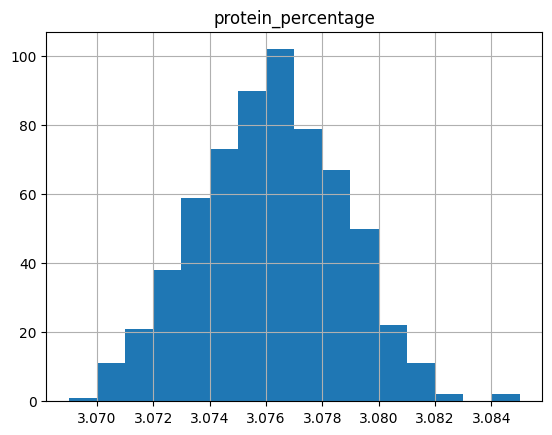

In [32]:
ferma_main.hist('protein_percentage', bins = 16)

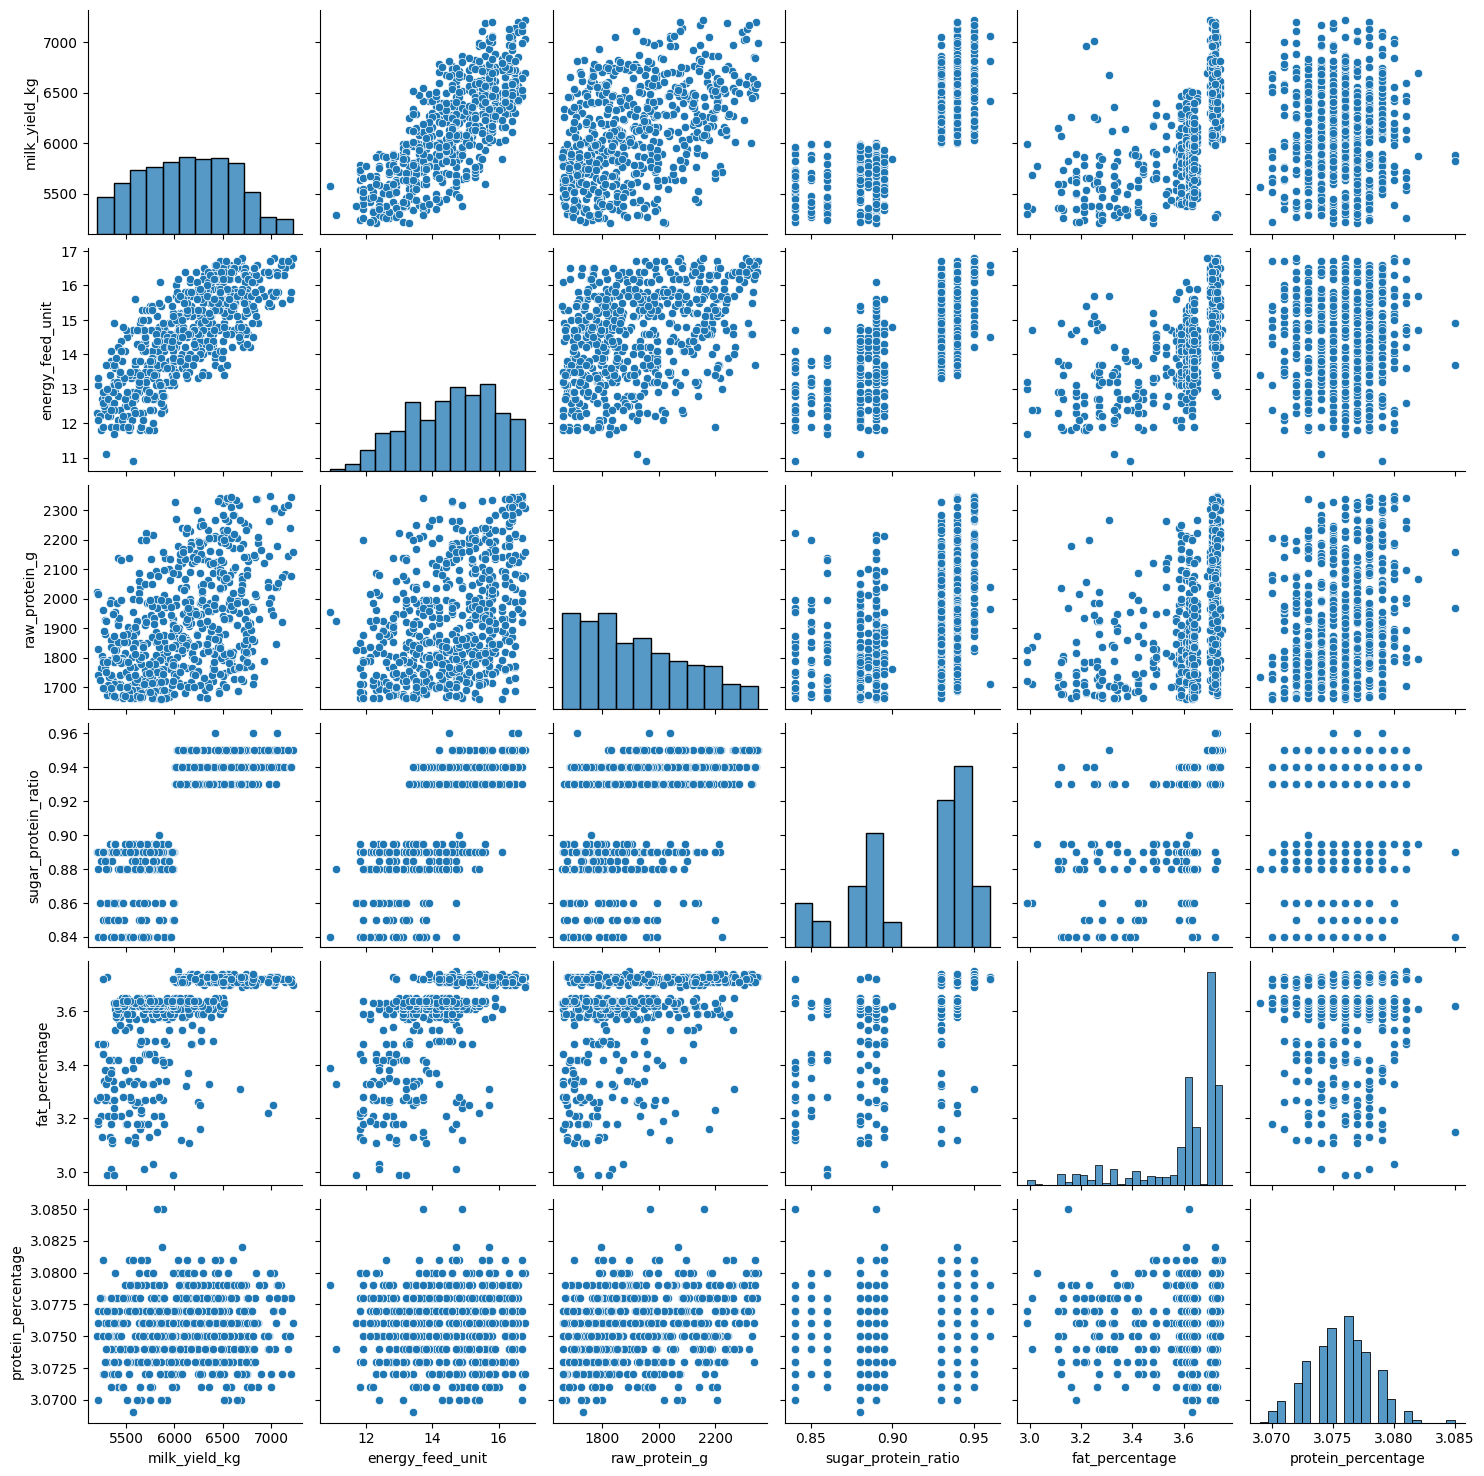

In [33]:
# Графики для количественных признаков
numerical_features = ['milk_yield_kg', 'energy_feed_unit', 'raw_protein_g', 'sugar_protein_ratio',
                      'fat_percentage', 'protein_percentage']
sns.pairplot(ferma_main[numerical_features])
plt.show()

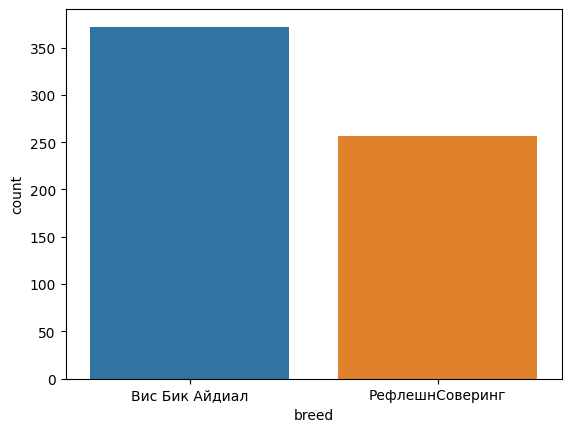

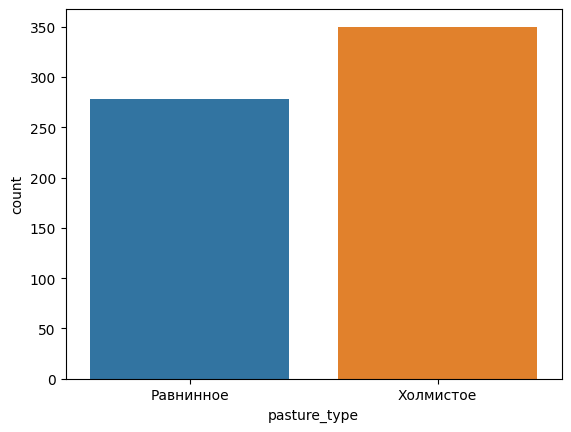

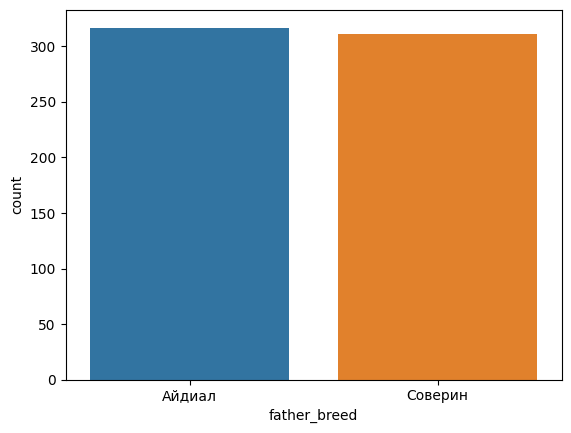

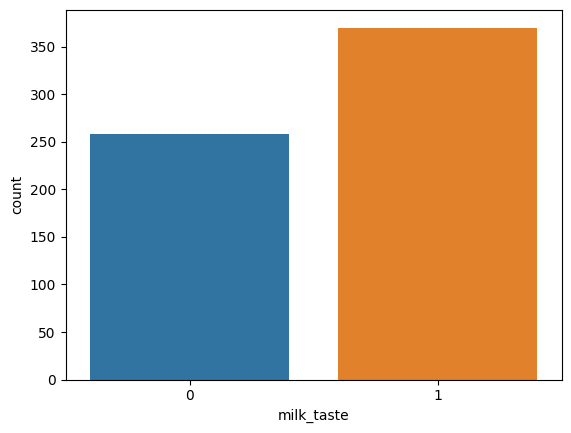

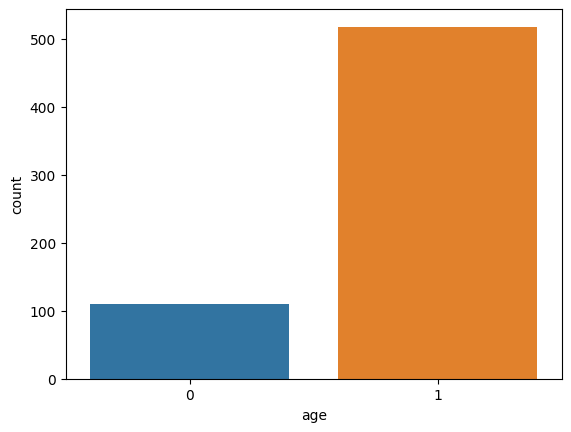

In [34]:
# Графики для категориальных признаков
categorical_features = ['breed', 'pasture_type', 'father_breed', 'milk_taste', 'age']
for feature in categorical_features:
    sns.countplot(x=feature, data=ferma_main)
    plt.show()


In [35]:
print("Кол-во положительных результатов в таргете, %", ferma_main['milk_taste'].sum()/ferma_main['milk_taste'].count()*100)


Кол-во положительных результатов в таргете, % 58.917197452229296


**Выводы по исследовательскому анализу данных:**

Средний удой коров составляет примерно 6187 кг молока в год, однако стандартное отклонение (1638 кг) довольно значительно, что может указывать на наличие больших колебаний в удоях между коровами.

Среднее значение показателя ЭКЕ (энергетической кормовой единицы) составляет примерно 14.54, что может свидетельствовать о высоком качестве корма, который получают коровы.

Содержание сырого протеина в корме имеет среднее значение около 1922 г, при этом стандартное отклонение составляет 182 г.

Среднее значение сахаро-протеинового соотношения (0.91) находится в пределах нормы, а также имеет небольшой разброс между значениями.

Содержание жира в молоке варьируется от 2.99% до 3.75%, со средним значением около 3.60%. Стандартное отклонение довольно низкое (0.17%), что может указывать на относительно небольшой разброс значений.

Содержание белка в молоке имеет среднее значение около 3.08%, с незначительным стандартным отклонением (0.003).

Почти 59% коров в стаде дают молоко, которое фермер считает вкусным.

Большинство коров в стаде (примерно 83%) имеют возраст более 2 лет.

## Шаг 4. Корреляционный анализ

In [36]:
# Рассчитываем матрицу корреляции
corr_matrix = ferma_main[['milk_yield_kg', 'energy_feed_unit', 'raw_protein_g', 'sugar_protein_ratio', 'breed', 'pasture_type' , 'father_breed', 'fat_percentage','protein_percentage','milk_taste','age']].corr(method = 'spearman')

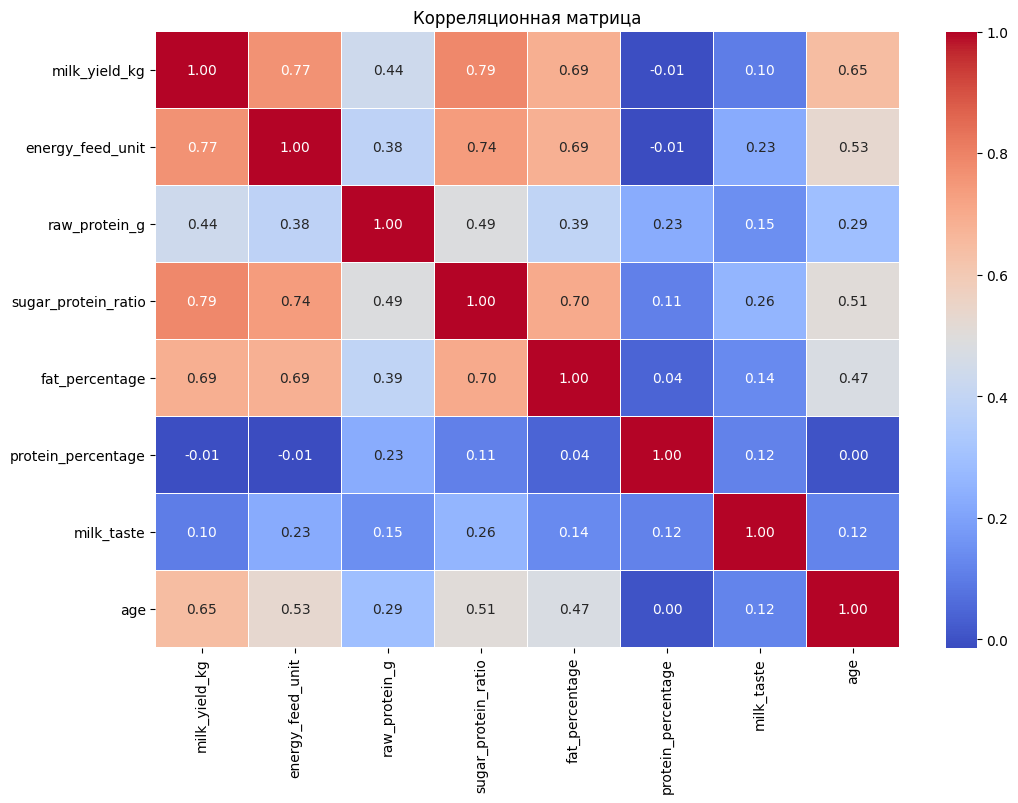

In [37]:
# Построение тепловой карты корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

 Высокую корреляцию имеют признак **Удой, кг** с **energy_feed_unit**, **sugar_protein_ratio**, **fat_percentage** и **age**
    
Вкус молока **milk_taste** имеет небольшую корреляцию со всеми признаками, наибольшую с **energy_feed_unit**
    


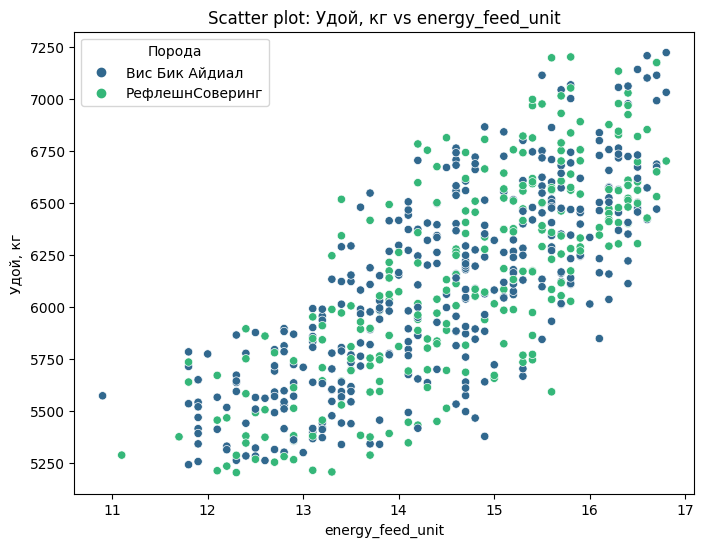

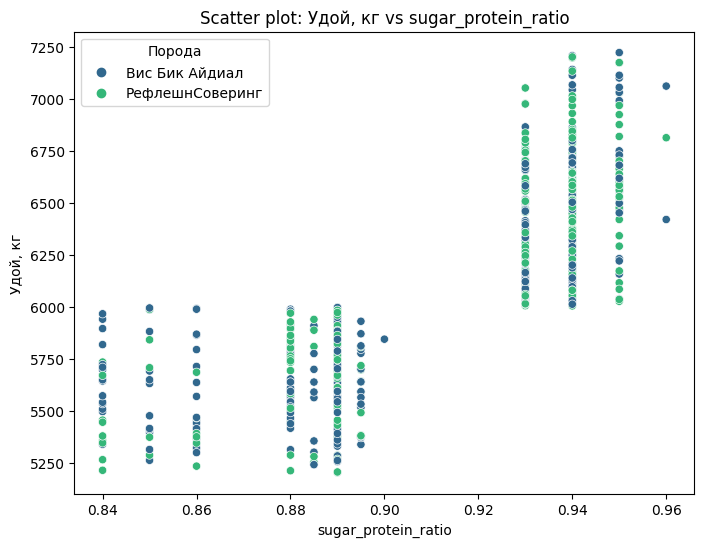

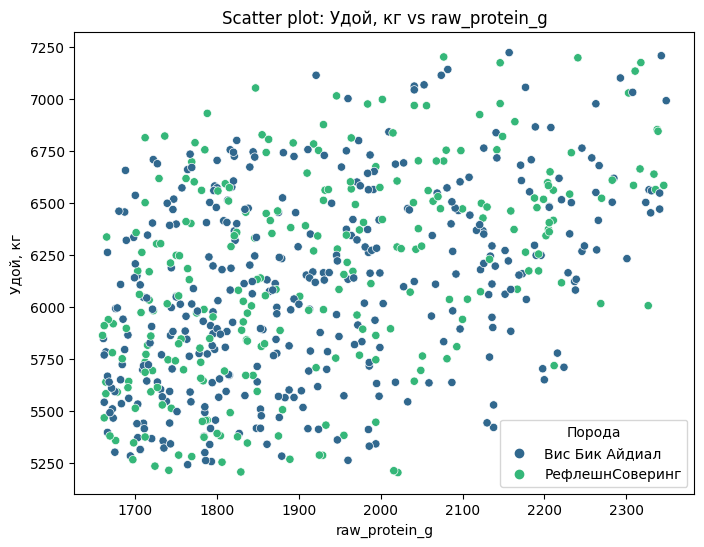

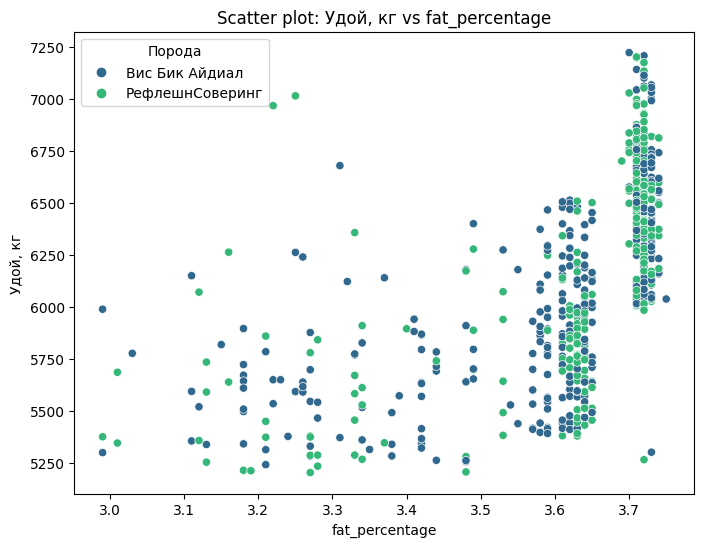

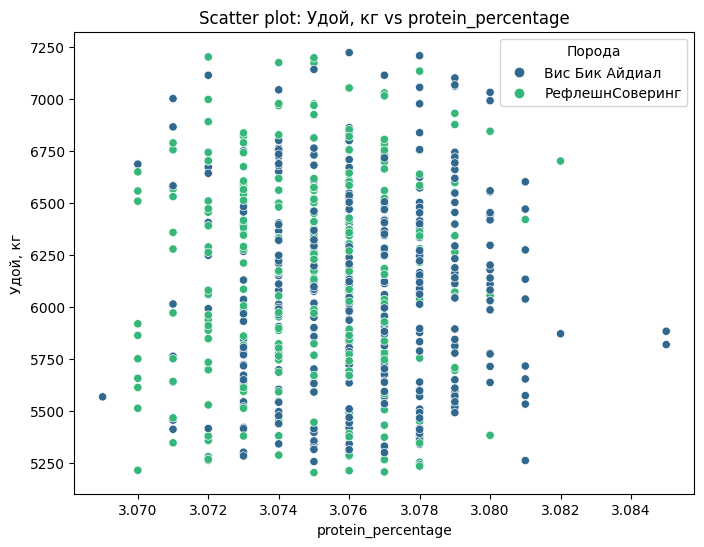

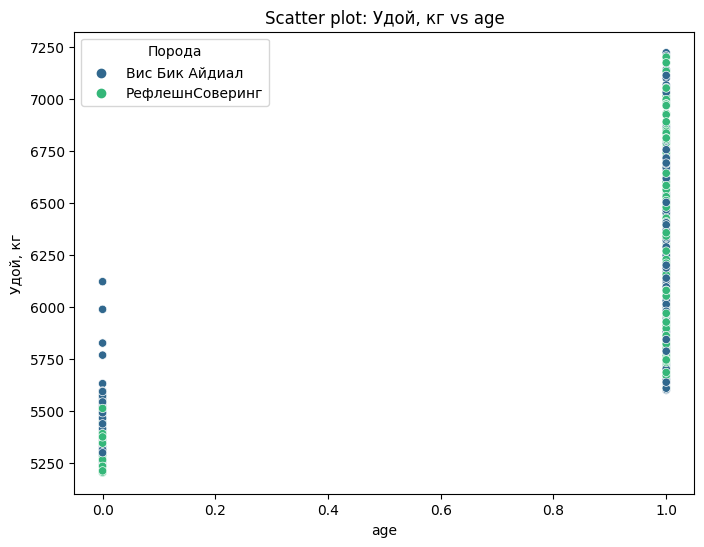

In [38]:
# Построение диаграмм рассеяния для признака "Удой, кг" и всех количественных признаков
scatter_features = ['energy_feed_unit', 'sugar_protein_ratio','raw_protein_g', 'fat_percentage', 'protein_percentage', 'age']
for feature in scatter_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='milk_yield_kg', data=ferma_main, hue='breed', palette='viridis')
    plt.title(f'Scatter plot: Удой, кг vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Удой, кг')
    plt.legend(title='Порода')
    plt.show()


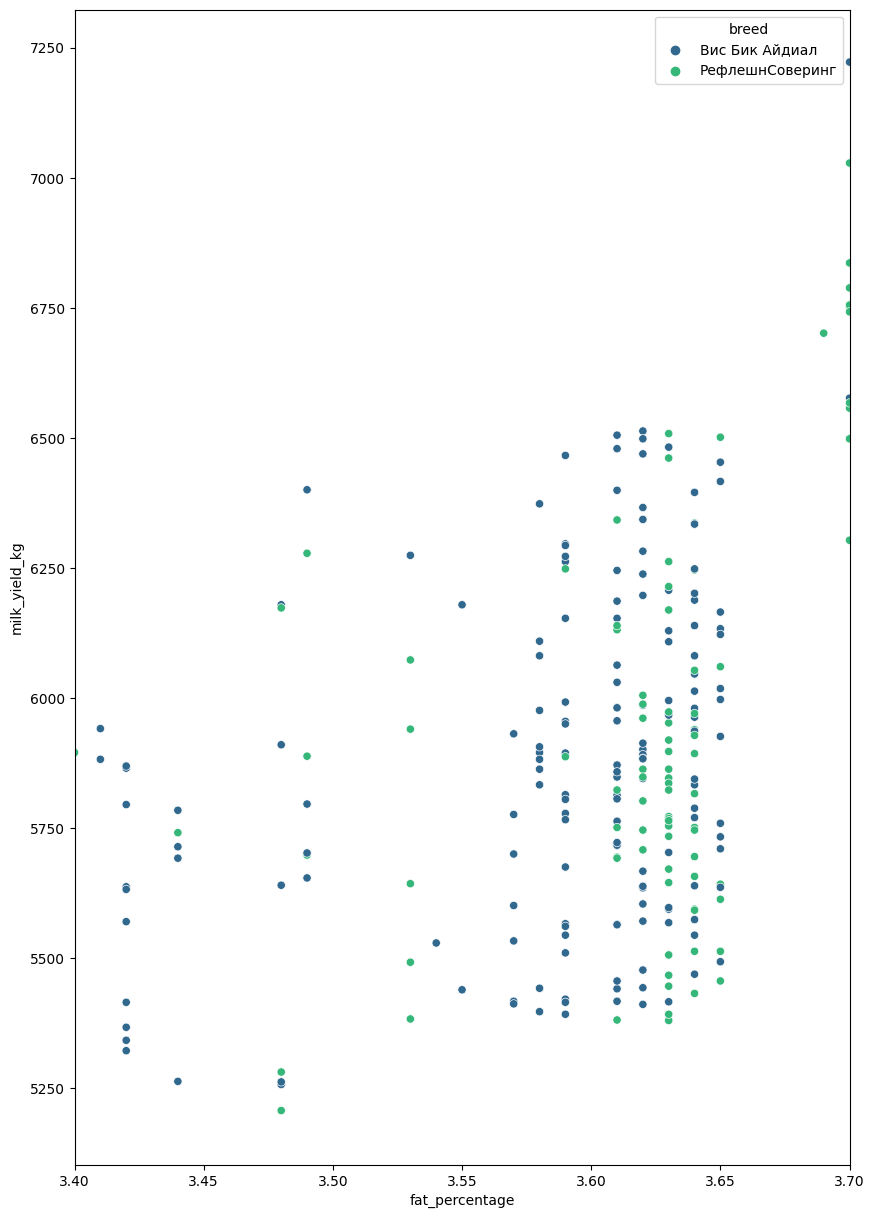

In [39]:
plt.figure(figsize=(10, 15))
plt.xlim(3.4, 3.7)
sns.scatterplot(x='fat_percentage', y = 'milk_yield_kg',data=ferma_main, hue='breed', palette='viridis')
plt.show()

In [40]:
# Определение границ интервалов
bins = [float('-inf'), 3.5, 3.68, float('inf')]

# Метки для каждого интервала
labels = ['1 группа', '2 группа', '3 группа']

# Создание нового столбца с категориями на основе жирности
ferma_main['fat_category'] = pd.cut(ferma_main['fat_percentage'], bins=bins, labels=labels)

# Вывод первых нескольких строк для проверки
ferma_main[['fat_percentage', 'fat_category']]

,fat_percentage,fat_category
0,3.58,2 группа
1,3.54,2 группа
2,3.59,2 группа
3,3.40,1 группа
4,3.73,3 группа
...,...,...
624,3.74,3 группа
625,3.64,2 группа
626,3.64,2 группа
627,3.64,2 группа


СПО разобъем на две группы:
        <br />спо менее 0.9                                                       <br />спо более 0.9 </font>

In [41]:
# Определение границ интервалов
bins = [float('-inf'), 0.91, float('inf')]

# Метки для каждого интервала
labels = ['спо менее 0.9', 'спо более 0.9']

# Создание нового столбца с категориями на основе жирности
ferma_main['sugar_protein_ratio_cat'] = pd.cut(ferma_main['sugar_protein_ratio'], bins=bins, labels=labels)

# Вывод первых нескольких строк для проверки
ferma_main[['sugar_protein_ratio', 'sugar_protein_ratio_cat']]

,sugar_protein_ratio,sugar_protein_ratio_cat
0,0.890,спо менее 0.9
1,0.890,спо менее 0.9
2,0.885,спо менее 0.9
3,0.885,спо менее 0.9
4,0.885,спо менее 0.9
...,...,...
624,0.940,спо более 0.9
625,0.880,спо менее 0.9
626,0.880,спо менее 0.9
627,0.890,спо менее 0.9


Выводы:  
1. Присутствует не линейность у СПО и жирности. Данные столбыцы были переведены в категориальный признак, а именно:  
     а) СПО разбили на две группы:  
        спо менее 0.9  
        спо более 0.9  
     б) Жироность разбили на три группы:  
        1 группа: x <= 3.5  
        2 группа: 3.5 < x < 3.68  
        3 группа: x > 3.68  
2. "порода_папы_быка" разный уровень корреляции по всем факторам. Скорее всего, "папа" сильнее влияет на удой, чем остальные факторы.
3. Отсутствует высоких корреляций (0.9 +), скорее всего мультиколлинеарности нет

## Шаг 5. Обучение модели линейной регрессии

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Функция для расчета MSE
def calculate_mse(y_test, y_pred):
    return mean_squared_error(y_test, y_pred)

# Функция для расчета MAE
def calculate_mae(y_test, y_pred):
    return mean_absolute_error(y_test, y_pred)

# Функция для расчета RMSE
def calculate_rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

Для построения модели выберем следующие признаки:   
- energy_feed_unit - ЭКЕ (Энергетическая кормовая единица)
- raw_protein_g  - Сырой протеин
- age  - возраст
- breed - порода
- father_breed  - порода папы_быка
- sugar_protein_ratio - СПО (Сахаро-протеиновое соотношение)
- pasture_type  - Тип пастбища
- fat_percentage - Жирность,%
- protein_percentage - Белок,%

In [43]:
# Выбор признаков
selected_features = ["energy_feed_unit", "raw_protein_g", "age",
                     "father_breed", "sugar_protein_ratio",
                     "pasture_type", 'breed',
                     "fat_percentage", "protein_percentage" ]
X = ferma_main[selected_features]
y = ferma_main["milk_yield_kg"]

In [44]:
# Разбиение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train.shape

(502, 9)

In [46]:
X_test.shape

(126, 9)

In [47]:
# Предобработка признаков
numeric_features = ["energy_feed_unit", "raw_protein_g", 
                    'sugar_protein_ratio', 'fat_percentage',
                   'protein_percentage']
categorical_features = ['age',"father_breed", 'pasture_type','breed']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



In [48]:
# Объединение предобработки и модели в пайплайн
model_1 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

In [49]:
# Обучение модели
model_1.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_1.predict(X_test)

# Оценка качества модели
r1 = r2_score(y_test, y_pred)
print("R² модели 1:", r1)

R² модели 1: 0.8012891555263226


In [50]:
# Расчет метрик
mse_model_1 = calculate_mse(y_test, model_1.predict(X_test))
mae_model_1 = calculate_mae(y_test, model_1.predict(X_test))
rmse_model_1 = calculate_rmse(y_test, model_1.predict(X_test))

print("Модель 1:")
print("MSE:", mse_model_1)
print("MAE:", mae_model_1)
print("RMSE:", rmse_model_1)

Модель 1:
MSE: 41251.4553728962
MAE: 158.86949147836586
RMSE: 203.10454296469146


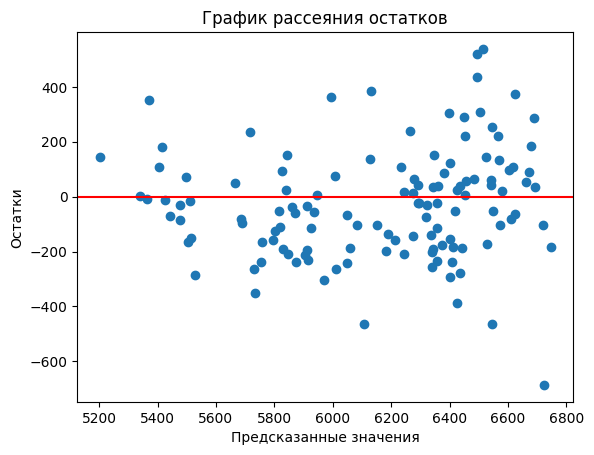

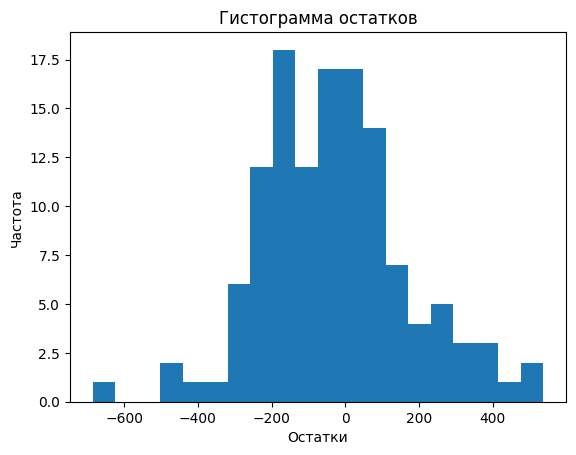

In [51]:
# График рассеяния остатков
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График рассеяния остатков')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Гистограмма остатков
plt.hist(residuals, bins=20)
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.show()

1. R² модели: 0.8028 - Это означает, что наша модель объясняет примерно 80% вариации целевой переменной (удой молока). В целом, это довольно хороший результат, но можно стремиться к улучшению модели для более точного прогнозирования удоя.
2. На граффике рассеяния остатков нет какой-либо явной структуры, в целом модель адекватно описывает данные.
3. Распределение остатков на гистограмме похоже на нормальное.

In [52]:
# Введение нового признака ЭКЕ в квадрате
ferma_main['energy_feed_unit_squared'] = ferma_main['energy_feed_unit'] ** 2

In [53]:
ferma_main.head()

,id,milk_yield_kg,energy_feed_unit,raw_protein_g,sugar_protein_ratio,breed,pasture_type,father_breed,fat_percentage,protein_percentage,milk_taste,age,fat_category,sugar_protein_ratio_cat,energy_feed_unit_squared
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,1,2 группа,спо менее 0.9,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,0,2 группа,спо менее 0.9,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,1,2 группа,спо менее 0.9,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,1,1 группа,спо менее 0.9,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,0,3 группа,спо менее 0.9,163.84


**Ранее были преобразованы в категориальные признаки СПО, жирность используем их для модели.**

In [54]:
# Выбор признаков
selected_features = ["energy_feed_unit_squared", "raw_protein_g", "age",
                     "father_breed", "sugar_protein_ratio_cat",
                     "pasture_type", 'breed',
                     "fat_category", "protein_percentage" ]
X = ferma_main[selected_features]
y = ferma_main["milk_yield_kg"]

In [55]:
# Разбиение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Предобработка признаков
numeric_features = ["energy_feed_unit_squared",
                    "raw_protein_g",'protein_percentage']
categorical_features = ['sugar_protein_ratio_cat','age',
                        "father_breed", 'pasture_type',
                        'breed', 'fat_category',]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [57]:
# Объединение предобработки и модели в пайплайн
model_2 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

In [58]:
# Обучение модели
model_2.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_2.predict(X_test)

In [59]:
# Оценка качества модели на тестовой выборке
y_pred = model_2.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² модели 2:", r2)

R² модели 2: 0.8143864517430593


In [60]:
# Расчет метрик
mse_model_2 = calculate_mse(y_test, model_2.predict(X_test))
mae_model_2 = calculate_mae(y_test, model_2.predict(X_test))
rmse_model_2 = calculate_rmse(y_test, model_2.predict(X_test))

print("Модель 2:")
print("MSE:", mse_model_2)
print("MAE:", mae_model_2)
print("RMSE:", rmse_model_2)

Модель 2:
MSE: 38532.51704911545
MAE: 149.31477715097526
RMSE: 196.29701232855138


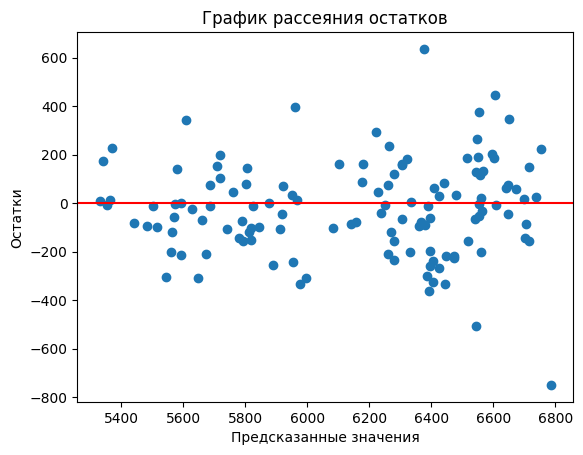

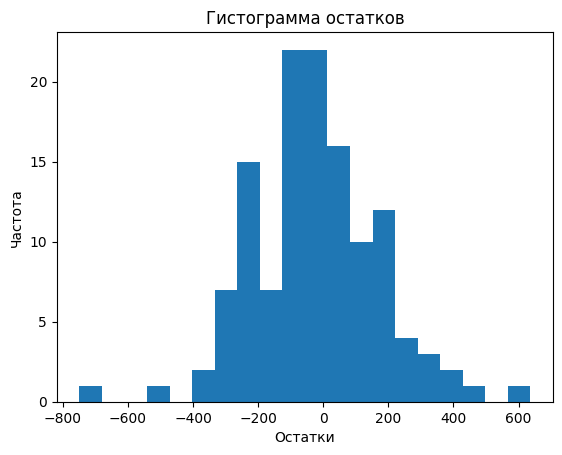

In [61]:

# Визуализация остатков
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График рассеяния остатков')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

plt.hist(residuals, bins=20)
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.show()

1. R² модели составляет 0.8143864517430595, что говорит о том, что около 81.43% дисперсии зависимой переменной (удоя молока) объясняется выбранными независимыми переменными (признаками). Это говорит о том, что вторая модель LinearRegression с учетом нелинейных связей между признаками и целевой переменной оказалась более точной по сравнению с первой моделью.
2. Анализ остатков на графике рассеяния показывает, что они случайны и распределены равномерно вокруг нуля, что хорошо согласуется с предположением линейности модели. 
3. Гистограмма остатков также показывает нормальное распределение

**Обучим 3 модель**

In [62]:
# Объединение данных по столбцу id
ferma_main = pd.merge(ferma_main, ferma_dad[['id', 'father_name']], on='id')

In [63]:
ferma_main.head()

,id,milk_yield_kg,energy_feed_unit,raw_protein_g,sugar_protein_ratio,breed,pasture_type,father_breed,fat_percentage,protein_percentage,milk_taste,age,fat_category,sugar_protein_ratio_cat,energy_feed_unit_squared,father_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,1,2 группа,спо менее 0.9,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,0,2 группа,спо менее 0.9,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,1,2 группа,спо менее 0.9,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,1,1 группа,спо менее 0.9,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,0,3 группа,спо менее 0.9,163.84,Барин


In [64]:
# Выбор признаков
selected_features = ["energy_feed_unit_squared", "raw_protein_g", "age",
                     "father_breed", "sugar_protein_ratio_cat",
                     "pasture_type", 'breed',
                     "fat_category", "protein_percentage", "father_name"]
X = ferma_main[selected_features]
y = ferma_main["milk_yield_kg"]

In [65]:
# Разбиение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Предобработка признаков
numeric_features = ["energy_feed_unit_squared",
                    "raw_protein_g",'protein_percentage']
categorical_features = ['sugar_protein_ratio_cat','age',
                        "father_breed", 'pasture_type',
                        'breed', 'fat_category',"father_name"]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [67]:
# Объединение предобработки и модели в пайплайн
model_3 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

In [68]:
# Обучение модели
model_3.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model_3.predict(X_test)

In [69]:
# Оценка качества модели на тестовой выборке
y_pred = model_3.predict(X_test)
r3 = r2_score(y_test, y_pred)
print("R² модели 3:", r3)

R² модели 3: 0.8276337378218296


In [70]:
# Расчет метрик
mse_model_3 = calculate_mse(y_test, model_3.predict(X_test))
mae_model_3 = calculate_mae(y_test, model_3.predict(X_test))
rmse_model_3 = calculate_rmse(y_test, model_3.predict(X_test))

print("Модель 3:")
print("MSE:", mse_model_3)
print("MAE:", mae_model_3)
print("RMSE:", rmse_model_3)

Модель 3:
MSE: 35782.44152134138
MAE: 145.7111065281474
RMSE: 189.16247387191092


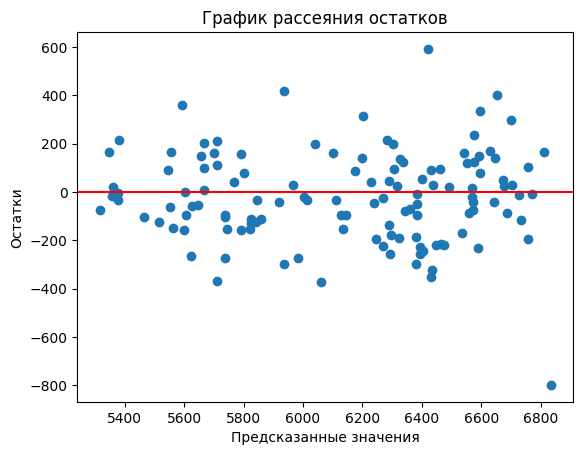

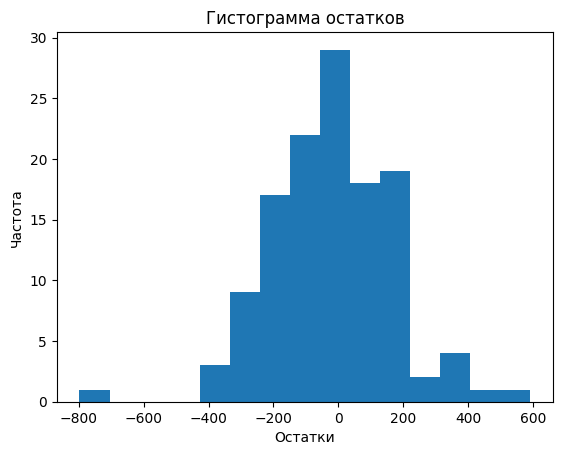

In [71]:

# Визуализация остатков
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График рассеяния остатков')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

plt.hist(residuals, bins=15)
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.show()

In [72]:
print("R² модели 1:", r1)
print("R² модели 2:", r2)
print("R² модели 3:", r3)

R² модели 1: 0.8012891555263226
R² модели 2: 0.8143864517430593
R² модели 3: 0.8276337378218296


In [73]:
# Вывод метрик для каждой модели
print("Модель 1:")
print("MSE:", mse_model_1)
print("MAE:", mae_model_1)
print("RMSE:", rmse_model_1)
print("\n")

print("Модель 2:")
print("MSE:", mse_model_2)
print("MAE:", mae_model_2)
print("RMSE:", rmse_model_2)
print("\n")

print("Модель 3:")
print("MSE:", mse_model_3)
print("MAE:", mae_model_3)
print("RMSE:", rmse_model_3)
print("\n")

# Выбор лучшей модели
best_model_mse = min(mse_model_1, mse_model_2, mse_model_3)
best_model_mae = min(mae_model_1, mae_model_2, mae_model_3)
best_model_rmse = min(rmse_model_1, rmse_model_2, rmse_model_3)

print("Лучшая модель по MSE:", best_model_mse)
print("Лучшая модель по MAE:", best_model_mae)
print("Лучшая модель по RMSE:", best_model_rmse)

Модель 1:
MSE: 41251.4553728962
MAE: 158.86949147836586
RMSE: 203.10454296469146


Модель 2:
MSE: 38532.51704911545
MAE: 149.31477715097526
RMSE: 196.29701232855138


Модель 3:
MSE: 35782.44152134138
MAE: 145.7111065281474
RMSE: 189.16247387191092


Лучшая модель по MSE: 35782.44152134138
Лучшая модель по MAE: 145.7111065281474
Лучшая модель по RMSE: 189.16247387191092


In [76]:
y_pred = model_3.predict(X_test)

In [78]:
# Доверительный интервал:
st.t.interval(alpha=0.95, df=len(y_pred)-1, loc=np.mean(y_pred), scale=st.sem(y_pred))

(6072.293238802845, 6219.924371657603)

### Прогнозирование удоя коров, которые фермер хочет купить

In [79]:
# Получение средних значений признаков из датасета ferma_main.csv и увеличение их на 5%
mean_energy_feed_unit = ferma_main['energy_feed_unit'].mean() * 1.05
mean_raw_protein_g = ferma_main['raw_protein_g'].mean() * 1.05
mean_sugar_protein_ratio = ferma_main['sugar_protein_ratio'] * 1.05

In [80]:
# Заполнение пропущенных значений в датасете cow_buy
cow_buy['energy_feed_unit_squared'] = ferma_main['energy_feed_unit'].mean() * 1.05
cow_buy['raw_protein_g'] = ferma_main['raw_protein_g'].mean() * 1.05
cow_buy['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'] * 1.05

In [81]:
cow_buy.head()

,breed,pasture_type,father_breed,father_name,fat_percentage_current,protein_percentage_current,age,energy_feed_unit_squared,raw_protein_g,sugar_protein_ratio
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,1,15.276162,2019.947532,0.93450
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,0,15.276162,2019.947532,0.93450
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,1,15.276162,2019.947532,0.92925
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,1,15.276162,2019.947532,0.92925
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,1,15.276162,2019.947532,0.92925


**Преобразуем столбец fat_percentage_current**

In [82]:
# Определение границ интервалов
bins = [float('-inf'), 3.5, 3.68, float('inf')]

# Метки для каждого интервала
labels = ['1 группа', '2 группа', '3 группа']

# Создание нового столбца с категориями на основе жирности
cow_buy['fat_category'] = pd.cut(cow_buy['fat_percentage_current'], bins=bins, labels=labels)

# Вывод первых нескольких строк для проверки
cow_buy[['fat_percentage_current', 'fat_category']]

,fat_percentage_current,fat_category
0,3.58,2 группа
1,3.54,2 группа
2,3.59,2 группа
3,3.40,1 группа
4,3.64,2 группа
5,3.63,2 группа
6,3.58,2 группа
7,3.57,2 группа
8,3.59,2 группа
9,3.40,1 группа


**Преобразуем столбец sugar_protein_ratio**

In [83]:
# Определение границ интервалов
bins = [float('-inf'), 0.91, float('inf')]

# Метки для каждого интервалаa
labels = ['спо менее 0.9', 'спо более 0.9']

# Создание нового столбца с категориями на основе жирности
cow_buy['sugar_protein_ratio_cat'] = pd.cut(cow_buy['sugar_protein_ratio'], bins=bins, labels=labels)

# Вывод первых нескольких строк для проверки
cow_buy[['sugar_protein_ratio', 'sugar_protein_ratio_cat']]

,sugar_protein_ratio,sugar_protein_ratio_cat
0,0.93450,спо более 0.9
1,0.93450,спо более 0.9
2,0.92925,спо более 0.9
3,0.92925,спо более 0.9
4,0.92925,спо более 0.9
5,0.92925,спо более 0.9
6,0.92925,спо более 0.9
7,0.97650,спо более 0.9
8,0.98700,спо более 0.9
9,0.93975,спо более 0.9


In [84]:
cow_buy.head()

,breed,pasture_type,father_breed,father_name,fat_percentage_current,protein_percentage_current,age,energy_feed_unit_squared,raw_protein_g,sugar_protein_ratio,fat_category,sugar_protein_ratio_cat
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,1,15.276162,2019.947532,0.93450,2 группа,спо более 0.9
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,0,15.276162,2019.947532,0.93450,2 группа,спо более 0.9
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,1,15.276162,2019.947532,0.92925,2 группа,спо более 0.9
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,1,15.276162,2019.947532,0.92925,1 группа,спо более 0.9
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,1,15.276162,2019.947532,0.92925,2 группа,спо более 0.9


In [85]:
cow_buy['protein_percentage'] = cow_buy['protein_percentage_current']

In [86]:
del cow_buy['protein_percentage_current']

In [87]:
del cow_buy['fat_percentage_current']

In [88]:
del cow_buy['sugar_protein_ratio']

In [89]:
cow_buy['raw_protein_g'] = cow_buy['raw_protein_g'].astype('int64')

In [90]:
model_3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['energy_feed_unit_squared',
                                                   'raw_protein_g',
                                                   'protein_percentage']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sugar_protein_ratio_cat',
                                                   'age', 'father_breed',
                                                   'pasture_type', 'breed',
                                                   

In [91]:
cow_buy = cow_buy[['energy_feed_unit_squared', 'raw_protein_g', 'age', 'father_breed', 'sugar_protein_ratio_cat', 'pasture_type','breed','fat_category','protein_percentage','father_name']]

In [92]:
cow_buy

,energy_feed_unit_squared,raw_protein_g,age,father_breed,sugar_protein_ratio_cat,pasture_type,breed,fat_category,protein_percentage,father_name
0,15.276162,2019,1,Айдиал,спо более 0.9,холмистое,Вис Бик Айдиал,2 группа,3.076,Геркулес
1,15.276162,2019,0,Соверин,спо более 0.9,равнинное,Вис Бик Айдиал,2 группа,3.081,Буйный
2,15.276162,2019,1,Соверин,спо более 0.9,равнинное,РефлешнСоверинг,2 группа,3.074,Барин
3,15.276162,2019,1,Айдиал,спо более 0.9,холмистое,РефлешнСоверинг,1 группа,3.061,Буйный
4,15.276162,2019,1,Айдиал,спо более 0.9,равнинное,РефлешнСоверинг,2 группа,3.074,Буйный
5,15.276162,2019,0,Соверин,спо более 0.9,равнинное,РефлешнСоверинг,2 группа,3.053,Геркулес
6,15.276162,2019,1,Айдиал,спо более 0.9,холмистое,Вис Бик Айдиал,2 группа,3.076,Геркулес
7,15.276162,2019,1,Соверин,спо более 0.9,равнинное,Вис Бик Айдиал,2 группа,3.079,Буйный
8,15.276162,2019,1,Соверин,спо более 0.9,равнинное,РефлешнСоверинг,2 группа,3.074,Барин
9,15.276162,2019,0,Айдиал,спо более 0.9,холмистое,РефлешнСоверинг,1 группа,3.079,Буйный


In [93]:
predictions = model_3.predict(cow_buy)

In [94]:
predictions

array([5733.55980863, 5487.84486668, 5456.07322511, 5851.63693432,
       5738.93301234, 5736.74693133, 5733.55980863, 5715.84784076,
       5456.07322511, 5473.41500708, 5891.58042788, 5990.58051209,
       6015.22034581, 5241.80259255, 5456.07322511, 5814.08219603,
       5666.25199814, 5969.1285986 , 5800.38570903, 5738.93301234])

In [95]:
cow_buy['predicted_milk_yield'] = predictions

In [96]:
cow_buy

,energy_feed_unit_squared,raw_protein_g,age,father_breed,sugar_protein_ratio_cat,pasture_type,breed,fat_category,protein_percentage,father_name,predicted_milk_yield
0,15.276162,2019,1,Айдиал,спо более 0.9,холмистое,Вис Бик Айдиал,2 группа,3.076,Геркулес,5733.559809
1,15.276162,2019,0,Соверин,спо более 0.9,равнинное,Вис Бик Айдиал,2 группа,3.081,Буйный,5487.844867
2,15.276162,2019,1,Соверин,спо более 0.9,равнинное,РефлешнСоверинг,2 группа,3.074,Барин,5456.073225
3,15.276162,2019,1,Айдиал,спо более 0.9,холмистое,РефлешнСоверинг,1 группа,3.061,Буйный,5851.636934
4,15.276162,2019,1,Айдиал,спо более 0.9,равнинное,РефлешнСоверинг,2 группа,3.074,Буйный,5738.933012
5,15.276162,2019,0,Соверин,спо более 0.9,равнинное,РефлешнСоверинг,2 группа,3.053,Геркулес,5736.746931
6,15.276162,2019,1,Айдиал,спо более 0.9,холмистое,Вис Бик Айдиал,2 группа,3.076,Геркулес,5733.559809
7,15.276162,2019,1,Соверин,спо более 0.9,равнинное,Вис Бик Айдиал,2 группа,3.079,Буйный,5715.847841
8,15.276162,2019,1,Соверин,спо более 0.9,равнинное,РефлешнСоверинг,2 группа,3.074,Барин,5456.073225
9,15.276162,2019,0,Айдиал,спо более 0.9,холмистое,РефлешнСоверинг,1 группа,3.079,Буйный,5473.415007


In [97]:
cow_buy.query('predicted_milk_yield > 6000')

,energy_feed_unit_squared,raw_protein_g,age,father_breed,sugar_protein_ratio_cat,pasture_type,breed,fat_category,protein_percentage,father_name,predicted_milk_yield
12,15.276162,2019,1,Айдиал,спо более 0.9,холмистое,Вис Бик Айдиал,2 группа,3.046,Геркулес,6015.220346


**Вывод:** 
Использовав наиболее удачную модель предсказания, получили что из 20 предложенных коров, только одна сооответсвует требованию заказчика (удой более 6000 кг в год)


## Обучение модели логистической регрессии

In [98]:
selected_features = ['protein_percentage', 
                    'sugar_protein_ratio_cat','age',
                        "father_breed", 'pasture_type',
                        'breed', 'fat_category',"father_name"]

numeric_features = ["energy_feed_unit_squared",
                    "raw_protein_g",'protein_percentage']
categorical_features = ['sugar_protein_ratio_cat','age',
                        "father_breed", 'pasture_type',
                        'breed', 'fat_category',"father_name"]

In [99]:
numeric_features = ['protein_percentage']
categorical_features = ['sugar_protein_ratio_cat','age',
                        "father_breed", 'pasture_type',
                        'breed', 'fat_category',"father_name"]

In [100]:
ferma_main.head()

,id,milk_yield_kg,energy_feed_unit,raw_protein_g,sugar_protein_ratio,breed,pasture_type,father_breed,fat_percentage,protein_percentage,milk_taste,age,fat_category,sugar_protein_ratio_cat,energy_feed_unit_squared,father_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,1,2 группа,спо менее 0.9,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,0,2 группа,спо менее 0.9,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,1,2 группа,спо менее 0.9,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,1,1 группа,спо менее 0.9,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,0,3 группа,спо менее 0.9,163.84,Барин


In [101]:
target = 'milk_taste'

In [102]:
X = ferma_main[selected_features]
y = ferma_main[target]

In [103]:
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [105]:
# Создание ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [106]:
# Создание пайплайна с предобработкой данных и моделью LogisticRegression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

In [107]:
# Обучение модели
pipeline.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = pipeline.predict(X_test)

In [108]:
# Вычисление метрик качества
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')




Accuracy: 0.6111111111111112
Recall: 0.6111111111111112
Precision: 0.6009880142533204
Confusion Matrix:


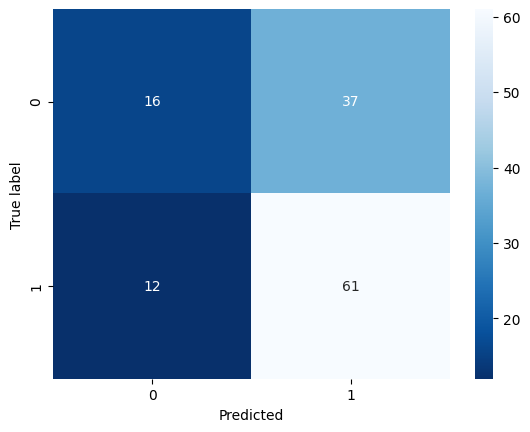

In [109]:
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
cm  = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Выводы:  
    Так как главное для заказчика — вкусное молоко, нам важнее, чтобы модель правильно классифицировала коров, у которых молоко вкуснее (положительные случаи). Таким образом, более важной является метрика recall, которая показывает, какую долю вкусного молока модель способна правильно идентифицировать среди всех действительно вкусных случаев.  

При этом, сравнивая матрицу ошибок, можно сделать вывод, что ложно отрицательные случаи (FN) (когда модель неправильно предсказывает, что молоко не вкусное, когда оно на самом деле вкусное) критичнее, чем ложно положительные случаи (FP) (когда модель неправильно предсказывает, что молоко вкусное, когда на самом деле оно не вкусное). Это связано с тем, что важнее пропустить вкусное молоко (и не купить корову) с целью предотвращения недовольства заказчика.

Чтобы снизить количество ложно отрицательных случаев (FN) и повысить recall, можно уменьшить порог принятия решения для класса "вкусное молоко". Это приведет к увеличению числа истинно положительных случаев (TP), тем самым снизив количество ложно отрицательных случаев (FN). Однако это также может привести к увеличению ложно положительных случаев (FP).

In [110]:
# Получение вероятностей принадлежности к классам
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Новый порог вероятности
new_threshold = 0.81  # Пример нового порога

# Предсказание классов на основе нового порога
y_pred_new_threshold = (y_prob >= new_threshold).astype(int)

# Рассчитываем новые значения метрик
new_recall = recall_score(y_test, y_pred_new_threshold)
new_precision = precision_score(y_test, y_pred_new_threshold)



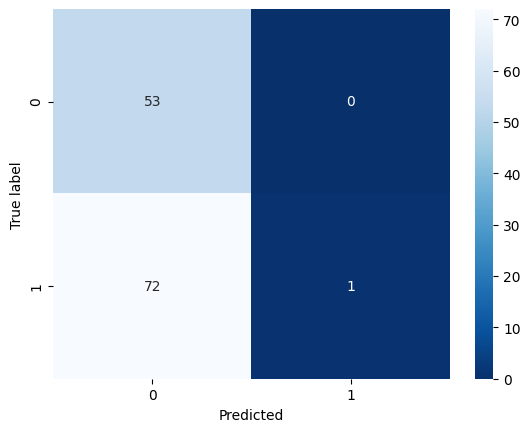

In [111]:
cm_2  = confusion_matrix(y_test, y_pred_new_threshold)
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

In [112]:
new_precision

1.0

In [113]:
new_recall

0.0136986301369863

**С новым порогом, модель стала гораздо эффективнеее**

### Спрогнозируем вкус молока коров

In [114]:
cow_buy_logic = cow_buy.copy()

In [115]:
cow_buy_logic.head()

,energy_feed_unit_squared,raw_protein_g,age,father_breed,sugar_protein_ratio_cat,pasture_type,breed,fat_category,protein_percentage,father_name,predicted_milk_yield
0,15.276162,2019,1,Айдиал,спо более 0.9,холмистое,Вис Бик Айдиал,2 группа,3.076,Геркулес,5733.559809
1,15.276162,2019,0,Соверин,спо более 0.9,равнинное,Вис Бик Айдиал,2 группа,3.081,Буйный,5487.844867
2,15.276162,2019,1,Соверин,спо более 0.9,равнинное,РефлешнСоверинг,2 группа,3.074,Барин,5456.073225
3,15.276162,2019,1,Айдиал,спо более 0.9,холмистое,РефлешнСоверинг,1 группа,3.061,Буйный,5851.636934
4,15.276162,2019,1,Айдиал,спо более 0.9,равнинное,РефлешнСоверинг,2 группа,3.074,Буйный,5738.933012


cow_buy_logic = cow_buy_logic[['energy_feed_unit_squared', 'raw_protein_g', 'protein_percentage', 'sugar_protein_ratio_cat', 'age', 'father_breed','pasture_type','breed','fat_category','father_name']]

In [116]:
cow_buy_logic = cow_buy_logic[['protein_percentage', 'sugar_protein_ratio_cat', 'age', 'father_breed','pasture_type','breed','fat_category','father_name']]

In [117]:
selected_features = ["age",
                     "father_breed", "sugar_protein_ratio_cat",
                     "pasture_type", 'breed',
                     "fat_category", "protein_percentage", "father_name"]

**Предскажем с учетом нового порога**

In [118]:
y_prob_cow_buy = pipeline.predict_proba(cow_buy_logic)[:, 1]

In [119]:
new_threshold = 0.81  

In [120]:
y_pred_cow_buy_new_threshold = (y_prob_cow_buy >= new_threshold).astype(int)

In [121]:
# Добавление прогнозов в датасет cow_buy_data
cow_buy_logic['predicted_taste'] = y_pred_cow_buy_new_threshold

# Вывод результатов
cow_buy_logic

,protein_percentage,sugar_protein_ratio_cat,age,father_breed,pasture_type,breed,fat_category,father_name,predicted_taste
0,3.076,спо более 0.9,1,Айдиал,холмистое,Вис Бик Айдиал,2 группа,Геркулес,0
1,3.081,спо более 0.9,0,Соверин,равнинное,Вис Бик Айдиал,2 группа,Буйный,0
2,3.074,спо более 0.9,1,Соверин,равнинное,РефлешнСоверинг,2 группа,Барин,0
3,3.061,спо более 0.9,1,Айдиал,холмистое,РефлешнСоверинг,1 группа,Буйный,0
4,3.074,спо более 0.9,1,Айдиал,равнинное,РефлешнСоверинг,2 группа,Буйный,0
5,3.053,спо более 0.9,0,Соверин,равнинное,РефлешнСоверинг,2 группа,Геркулес,0
6,3.076,спо более 0.9,1,Айдиал,холмистое,Вис Бик Айдиал,2 группа,Геркулес,0
7,3.079,спо более 0.9,1,Соверин,равнинное,Вис Бик Айдиал,2 группа,Буйный,0
8,3.074,спо более 0.9,1,Соверин,равнинное,РефлешнСоверинг,2 группа,Барин,0
9,3.079,спо более 0.9,0,Айдиал,холмистое,РефлешнСоверинг,1 группа,Буйный,0


In [122]:
cow_buy_logic.query('predicted_taste == 1')

,protein_percentage,sugar_protein_ratio_cat,age,father_breed,pasture_type,breed,fat_category,father_name,predicted_taste


In [123]:
cow_buy['predicted_taste'] = cow_buy_logic['predicted_taste']

## Итоговые выводы

В проекте необходимо было предсказать наиболее подходящих для покупки коров.
Для этого были выполнены следующие шаги:

1. Были получены 3 датафрейма (ferma_main.csv, ferma_dad.csv, cow_buy.csv) для которых была произведена предобработка данных:  
    **Для датафрейма "ferma_main"**
    1. Исправили однотипные значения в "ferma_main" в столбце с типом пастбищ ('Равнинные' на 'Равнинное')
    2. Убраны лишние дубликаты в "ferma_main"
    3. Изменены типы данных из 'object' в числовые типы, а именно столбцы (energy_feed_unit, sugar_protein_ratio, fat_percentage и protein_percentage)
    4. Преобразовали столбы milk_taste и age в бинарный формат 

   **Для датафрейма "cow_buy"**
    1. Столбцы fat_percentage_current и protein_percentage_current преобразованы в числовой тип
    2. Столбец "age" преобразован в бинарный формат
    
2. Был произведен исследователький анализ исходных данных ferma_main, были удалены выбросы, выявлены зависимости между данными:
    а) milk_yield_kg и energy_feed_unit: На графике рассеяния видно, как связаны удой молока и энергетическая кормовая единица. Можно заметить, что в целом удой молока увеличивается с увеличением энергетической кормовой единицы.

    б) milk_yield_kg и raw_protein_g: Также на графике рассеяния видна некоторая взаимосвязь между удоем молока и содержанием сырого протеина в корме. Это может свидетельствовать о том, что более высокое содержание протеина в корме может способствовать увеличению удоя молока.

    в) energy_feed_unit и raw_protein_g: График показывает связь между энергетической кормовой единицей и содержанием сырого протеина в корме. Видно, что с увеличением энергетической кормовой единицы содержание сырого протеина в корме также может увеличиваться.
   


  


**Графики и таблицы для корреляционного анализа**

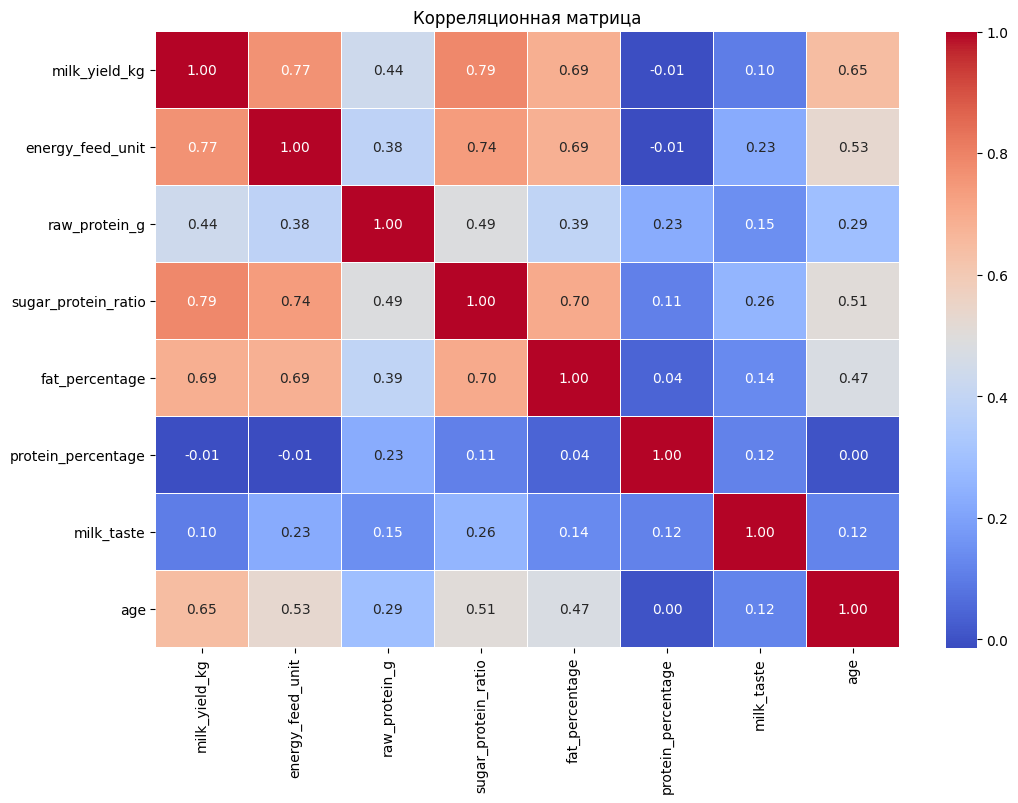

In [124]:
# Построение тепловой карты корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

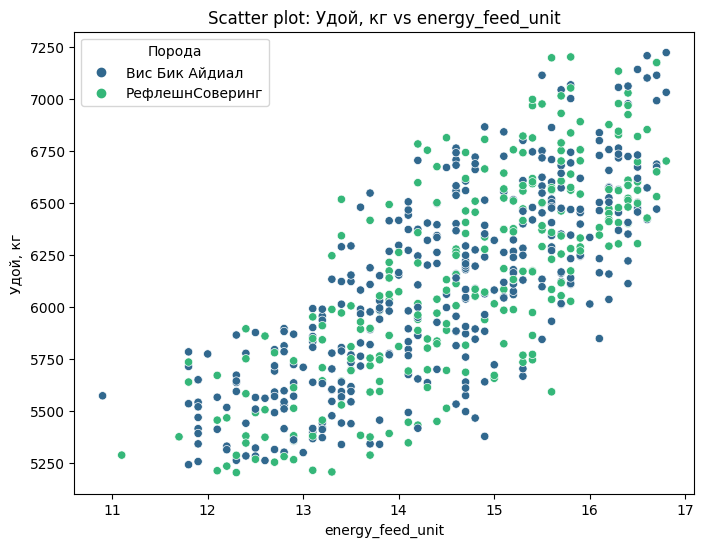

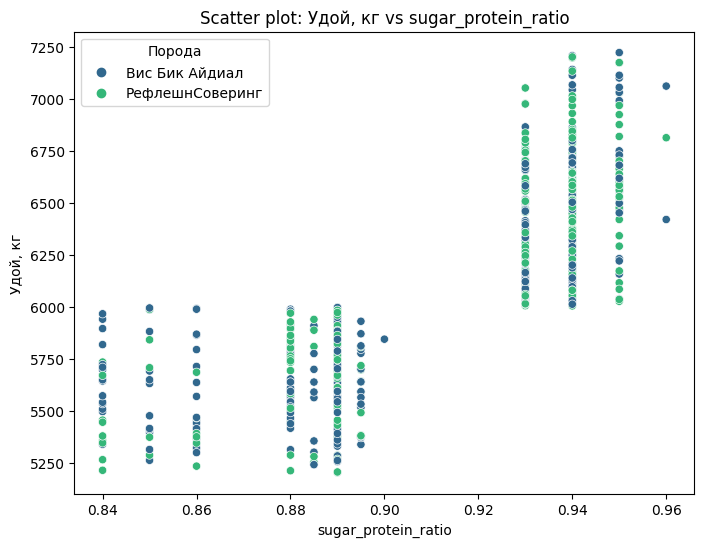

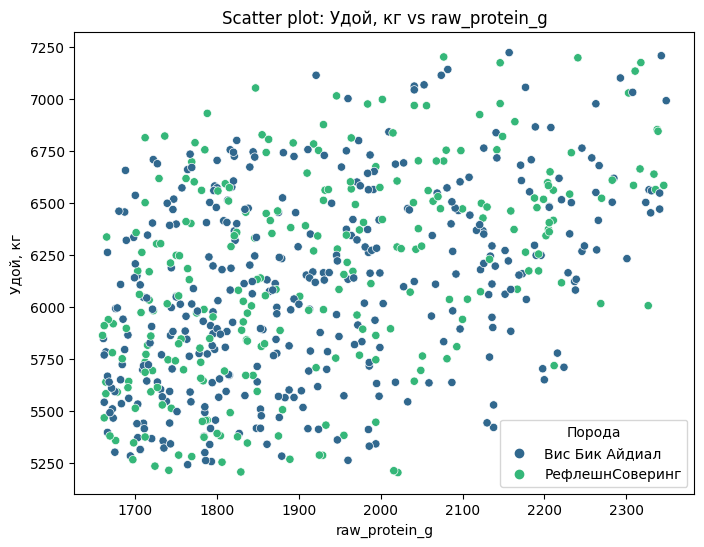

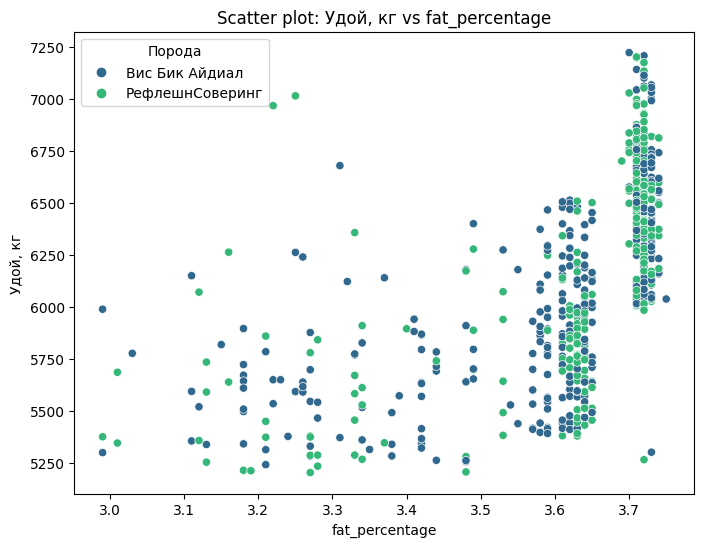

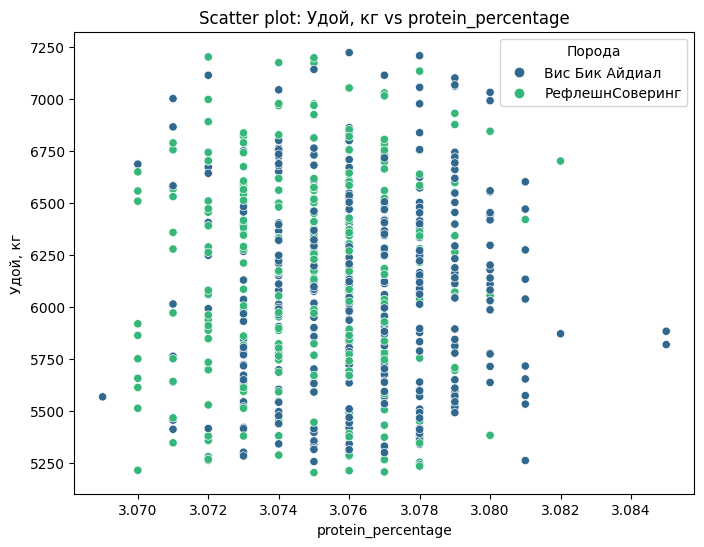

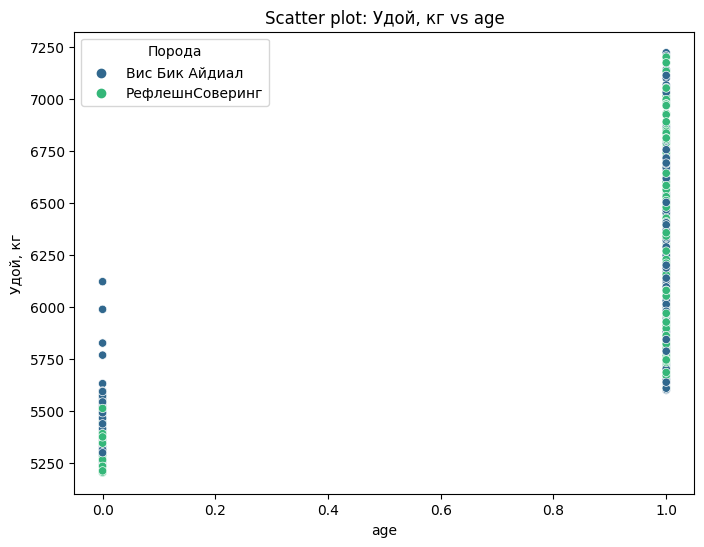

In [125]:
# Построение диаграмм рассеяния для признака "Удой, кг" и всех количественных признаков
scatter_features = ['energy_feed_unit', 'sugar_protein_ratio','raw_protein_g', 'fat_percentage', 'protein_percentage', 'age']
for feature in scatter_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='milk_yield_kg', data=ferma_main, hue='breed', palette='viridis')
    plt.title(f'Scatter plot: Удой, кг vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Удой, кг')
    plt.legend(title='Порода')
    plt.show()


3. Был проведен корреляционный анализ со следующими выводами:
- очень высоких корреляций (0.9 +) не видно, скорее всего мультиколлинеарности нет

- нелинейность связи удоя с: спо, жирностью, эке

- спо: постоянная зависимоть на разных уровнях. до 0.91 - одна зависимость с целевой. После 0.91 - иная. Ввели новую категориальную переменную: "спо менее 0.9"/"спо более 0.9".

- жирность: Наблюдается три зоны с разной зависимостью с целевой: до 3.5, между 3.5 и 3.68, и более 3.68 
- по эке: нужно ввести нелинейность, чтобы учесть кривизну


4. Обучили 3 модели линейной регрессии для предсказания удоя, кг в год
Наиболее лучшая модель 3 (  
R² модели 3: 0.8276337378218295   
R² модели 2: 0.8143864517430595   
R² модели 1: 0.8012891555263226)  
В 3 модели были использованы данные по "Имя папы коровы", а также введен признак "ЭКЕ в квадрате"
5. Обучили модель логистической регрессии для предсказания вкуса молока.


**Результаты предсказаний можно увидеть в таблице ниже:**

In [126]:
cow_buy.query('predicted_taste == 1 or predicted_milk_yield > 6000')

,energy_feed_unit_squared,raw_protein_g,age,father_breed,sugar_protein_ratio_cat,pasture_type,breed,fat_category,protein_percentage,father_name,predicted_milk_yield,predicted_taste
12,15.276162,2019,1,Айдиал,спо более 0.9,холмистое,Вис Бик Айдиал,2 группа,3.046,Геркулес,6015.220346,0


1. Из предложенных для покупки коров согласно критериям фермера (вкус молока и удой более 6000 кг в год) подходят 4 коровы.  
Модели позволяют фермеру прогнозировать удой и вкус молока коров, что помогает ему принимать более информированные решения о покупке.  

Покупка коров по предложенной моделе, позволят минимизировать риск расходов и максимизировать потенциальную прибыль.

2. Обе модели (линейная регрессия для прогнозирования удоя и логистическая регрессия для прогнозирования вкуса молока) показывают хорошие результаты, позволяя фермеру делать точные прогнозы на основе имеющихся данных.  
Метрика recall логистической модели = 0.8904109589041096, благодаря этому модель с большой вероятностью предскажет, что молоко вкусное и предложит его купить
